In [1]:
# Import main packages
import sys, os
sys.path.insert(1, os.path.abspath('..') )
import ECOdiagnostics as eco
from ECOdiagnostics.utils import config_parser
import xarray as xr
import xgcm
import numpy as np

# Import matplotlib for plotting and functions to override default values
import matplotlib.pyplot as plt
from ECOanalysis import update_plotstyle, cmap_OB
cmap_OB=cmap_OB(); update_plotstyle()

In [2]:
exp = 'EXP00_5d50'
path_to_dataset = 'data/'+exp+'/' # Here chosen as relative path, adjust if notebook is executed outside of 
file_name_proc = exp+'_proc*'       # Import all files with this prefix
file_name_pre = exp+'_pre*'       # Import all files with this prefix
ds     = xr.open_mfdataset(path_to_dataset+file_name_proc, decode_times=False, parallel=True, data_vars='minimal', compat='override', coords='minimal') 
ds_raw = xr.open_mfdataset(path_to_dataset+file_name_pre,  decode_times=False, parallel=True, data_vars='minimal') 

# get configuration from processing for matching parameters
kwargs_proc, kwargs_pre, kwargs_sim = config_parser(config_path='../ECOprocessing/Configs/'+exp, sub_config='sub_5d50')

# define xgcm configuration based on dataset metrics
_metrics = {('X',): ['e1tm', 'e1um', 'e1vm', 'e1fm'],
     ('Y',): ['e2tm', 'e2um', 'e2vm', 'e2fm'],
     ('Z',): ['e3tm', 'e3um', 'e3vm', 'e3wm']}

grid = xgcm.Grid(ds, metrics=_metrics, periodic=False) # define xgcm grid
grid_ops = eco.Grid_ops(grid, maskargs={'mask':'nan'}) # define gridoperations. With {'mask':'nan'} operations apply a nan-mask, replacing 0 by nan in data

# define coordinates to pass to diagnostics
_coords = {'X': ds.glamt,
           'Y': ds.gphit, 
           'Z': ds.depth_1d}

properties= eco.Properties(grid_ops, _coords, eos_properties=kwargs_sim['eos'])
energetics= eco.Energetics(grid_ops, properties)
energetics_trend= eco.Energetics_trends(grid_ops,properties,
                                             '../ECOdiagnostics/diagnostics/defaults/processes.ini')

../ECOprocessing/Configs/EXP00_5d50/base.yml
Update processing configuration with sub_5d50


In [3]:
ds

<xarray.Dataset>
Dimensions:        (z_f: 36, t: 3600, x_c: 20, y_c: 40, z_c: 36, x_f: 20,
                    y_f: 40)
Coordinates: (12/20)
  * z_f            (z_f) float64 -0.5 0.5 1.5 2.5 3.5 ... 31.5 32.5 33.5 34.5
  * t              (t) float64 -5.907e+10 -5.907e+10 ... -5.751e+10 -5.751e+10
    time_centered  (t) float64 dask.array<chunksize=(360,), meta=np.ndarray>
  * x_c            (x_c) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
  * y_c            (y_c) int64 0 1 2 3 4 5 6 7 8 ... 31 32 33 34 35 36 37 38 39
  * z_c            (z_c) int64 0 1 2 3 4 5 6 7 8 ... 27 28 29 30 31 32 33 34 35
    ...             ...
    gphiv          (y_f, x_c) float64 dask.array<chunksize=(40, 20), meta=np.ndarray>
    glamv          (y_f, x_c) float64 dask.array<chunksize=(40, 20), meta=np.ndarray>
    gphif          (y_f, x_f) float64 dask.array<chunksize=(40, 20), meta=np.ndarray>
    glamf          (y_f, x_f) float64 dask.array<chunksize=(40, 20), meta=np.ndarray>
    gdept_0        (z_c, y_c, x_c) float64 dask.array<chunksize=(36, 40, 20), meta=np.ndarray>
    gdepw_0        (z_f, y_c, x_c) float64 dask.array<chunksize=(36, 40, 20), meta=np.ndarray>
Data variables: (12/84)
    wo             (t, z_f, y_c, x_c) float32 dask.array<chunksize=(360, 36, 40, 20), meta=np.ndarray>
    wo_e           (t, z_f, y_c, x_c) float32 dask.array<chunksize=(360, 36, 40, 20), meta=np.ndarray>
    k_evd          (t, z_f, y_c, x_c) float32 dask.array<chunksize=(360, 36, 40, 20), meta=np.ndarray>
    to             (t, z_c, y_c, x_c) float32 dask.array<chunksize=(360, 36, 40, 20), meta=np.ndarray>
    so             (t, z_c, y_c, x_c) float32 dask.array<chunksize=(360, 36, 40, 20), meta=np.ndarray>
    zos            (t, y_c, x_c) float32 dask.array<chunksize=(360, 40, 20), meta=np.ndarray>
    ...             ...
    dzg_Sness      (t, z_c, y_c, x_c) float64 dask.array<chunksize=(360, 36, 40, 20), meta=np.ndarray>
    dzg_Kconvp2k   (t, z_c, y_c, x_c) float32 dask.array<chunksize=(360, 36, 40, 20), meta=np.ndarray>
    psi            (t, z_f, y_f) float64 dask.array<chunksize=(360, 36, 40), meta=np.ndarray>
    psi_maxz       (t, y_f) float64 dask.array<chunksize=(360, 40), meta=np.ndarray>
    psi_dmoc       (t) float64 dask.array<chunksize=(360,), meta=np.ndarray>
    psi_tmoc       (t) float64 dask.array<chunksize=(360,), meta=np.ndarray>
Attributes: (12/13)
    name:                    NEMO dataset
    description:             Ocean grid variables, set on the proper positions
    title:                   Ocean grid variables
    Conventions:             CF-1.6
    timeStamp:               2022-Dec-05 12:57:50 GMT
    uuid:                    47f91617-7a1c-4188-beb5-55c652f428ca
    ...                      ...
    DOMAIN_size_global:      [20 40]
    DOMAIN_halo_size_start:  [0 0]
    DOMAIN_halo_size_end:    [0 0]
    DOMAIN_type:             BOX
    nn_cfg:                  2
    cn_cfg:                  BASIN

In [18]:
ds_raw

<xarray.Dataset>
Dimensions:               (z_c: 36, t: 3600, axis_nbounds: 2, y_c: 40, x_c: 20,
                           x_f: 20, y_f: 40, z_f: 36)
Coordinates: (12/20)
  * z_c                   (z_c) int64 0 1 2 3 4 5 6 7 ... 29 30 31 32 33 34 35
    time_centered         (t) float64 dask.array<chunksize=(180,), meta=np.ndarray>
  * t                     (t) float64 -5.907e+10 -5.907e+10 ... -5.751e+10
  * x_c                   (x_c) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19
  * y_c                   (y_c) int64 0 1 2 3 4 5 6 7 ... 33 34 35 36 37 38 39
  * x_f                   (x_f) float64 0.5 1.5 2.5 3.5 ... 16.5 17.5 18.5 19.5
    ...                    ...
    gphit                 (y_c, x_c) float64 dask.array<chunksize=(40, 20), meta=np.ndarray>
    gphiu                 (y_c, x_f) float64 dask.array<chunksize=(40, 20), meta=np.ndarray>
    gphiv                 (y_f, x_c) float64 dask.array<chunksize=(40, 20), meta=np.ndarray>
    gphif                 (y_f, x_f) float64 dask.array<chunksize=(40, 20), meta=np.ndarray>
    gdept_0               (z_c, y_c, x_c) float64 dask.array<chunksize=(36, 40, 20), meta=np.ndarray>
    gdepw_0               (z_f, y_c, x_c) float64 dask.array<chunksize=(36, 40, 20), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/69)
    deptht_bounds         (t, z_c, axis_nbounds) float32 dask.array<chunksize=(180, 36, 2), meta=np.ndarray>
    time_centered_bounds  (t, axis_nbounds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
    t_bounds              (t, axis_nbounds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
    time_instant_bounds   (t, axis_nbounds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
    e3t                   (t, z_c, y_c, x_c) float32 dask.array<chunksize=(180, 36, 40, 20), meta=np.ndarray>
    thetao                (t, z_c, y_c, x_c) float32 dask.array<chunksize=(180, 36, 40, 20), meta=np.ndarray>
    ...                    ...
    top_level             (t, y_c, x_c) int32 dask.array<chunksize=(180, 40, 20), meta=np.ndarray>
    bottom_level          (t, y_c, x_c) int32 dask.array<chunksize=(180, 40, 20), meta=np.ndarray>
    stiffness             (t, y_c, x_c) float64 dask.array<chunksize=(180, 40, 20), meta=np.ndarray>
    ht_0                  (t, y_c, x_c) float64 dask.array<chunksize=(180, 40, 20), meta=np.ndarray>
    hu_0                  (t, y_c, x_f) float64 dask.array<chunksize=(180, 40, 20), meta=np.ndarray>
    hv_0                  (t, y_f, x_c) float64 dask.array<chunksize=(180, 40, 20), meta=np.ndarray>
Attributes: (12/13)
    name:                    NEMO dataset
    description:             Ocean grid variables, set on the proper positions
    title:                   Ocean grid variables
    Conventions:             CF-1.6
    timeStamp:               2022-Aug-22 07:32:10 GMT
    uuid:                    32bc07ae-7338-4781-85b4-dbdf733a458f
    ...                      ...
    DOMAIN_size_global:      [20 40]
    DOMAIN_halo_size_start:  [0 0]
    DOMAIN_halo_size_end:    [0 0]
    DOMAIN_type:             BOX
    nn_cfg:                  2
    cn_cfg:                  BASIN

In [3]:
e3t_shift=ds.e3tm.copy().shift(z_c=1).fillna(0)
depth_w =xr.DataArray(data=(- e3t_shift.cumsum('z_c')*ds.mask_bd_t).compute().values, dims=ds.e3wm.dims)

to_ws = grid.interp(ds.to_s,'Z',boundary='extend')
so_ws = grid.interp(ds.so_s,'Z',boundary='extend')
dtdz_w = grid.derivative(ds.to_s,'Z',boundary='extend') 

dh_TZ_w = properties.dh_TZ(to_ws, so_ws, depth_w)
dh_SZ_w = properties.dh_SZ(to_ws, so_ws, depth_w)
dh_TT_w = properties.dh_TT(depth_w,Z_r=-1878)

mask_avt= grid_ops.nan_mask(ds.k_evd)*ds.k_evd/100
mask_avt_invert=(ds.mask_bd_w)*((-(mask_avt-1)).fillna(1))

In [4]:
#KN2_h_w = (-(dh_TZ_w-dtdz_w*dh_TT_w)*F_tzdf_w-dh_SZ_w*F_szdf_w).compute()
F_tzdf_w=grid.cumint(ds_raw.ttrd_zdf,'Z',boundary='fill',fill_value=0).compute()
F_szdf_w=grid.cumint(ds_raw.strd_zdf,'Z',boundary='fill',fill_value=0).compute()
KN2_h_w_avt =     (-(dh_TZ_w-dtdz_w*dh_TT_w)*F_tzdf_w*mask_avt.fillna(0)- dh_SZ_w*F_szdf_w*mask_avt.fillna(0)).compute()
KN2_h_w_avt_inv = (-(dh_TZ_w-dtdz_w*dh_TT_w)*F_tzdf_w*mask_avt_invert   - dh_SZ_w*F_szdf_w*mask_avt_invert).compute()

<Figure size 864x576 with 0 Axes>

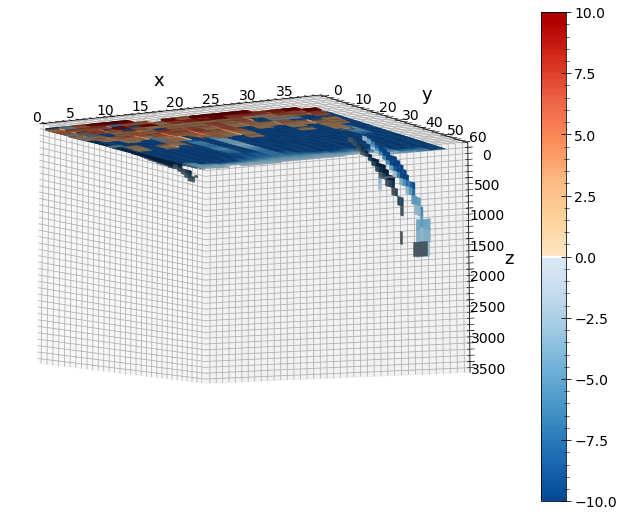

In [5]:
import matplotlib 
norm=matplotlib.colors.Normalize(vmin=-10,vmax=10)
scalarMap = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap_OB)

def get_rgb3d(proc):
    colors=np.zeros(proc.shape+(4,))#proc.copy().expand_dims('c':).values
    for i in range(colors.shape[0]):
        colors[i]=scalarMap.to_rgba(proc[i])
    return colors

fig=plt.figure(figsize=(12,8))
ax = plt.figure().add_subplot(projection='3d')

x3d=ds.glamu.expand_dims({'z_c':ds.z_c})
y3d=ds.gphiv.expand_dims({'z_c':ds.z_c})
#z3d=ds.gdepw_0
z3d=ds.gdept_0

proc = (-KN2_h_w_avt*1e9).mean('t')
proc_threshold = np.logical_or(proc<-2,proc>2)
colors=get_rgb3d(proc.where(proc_threshold))
proc_plot=proc#.where(proc_threshold)
ax.voxels(x3d, y3d, z3d, proc_plot[1:,1:,1:],
          facecolors=colors[1:,1:,1:],
          edgecolors=colors[1:,1:,1:],  # brighter
          linewidth=0.5)
ax.set(xlabel='x', ylabel='y', zlabel='z',zlim3d=(3600,0),xlim3d=(0,38),ylim3d=(0,60))

ax.view_init(-7,-60)
plt.colorbar(scalarMap,ax=ax)